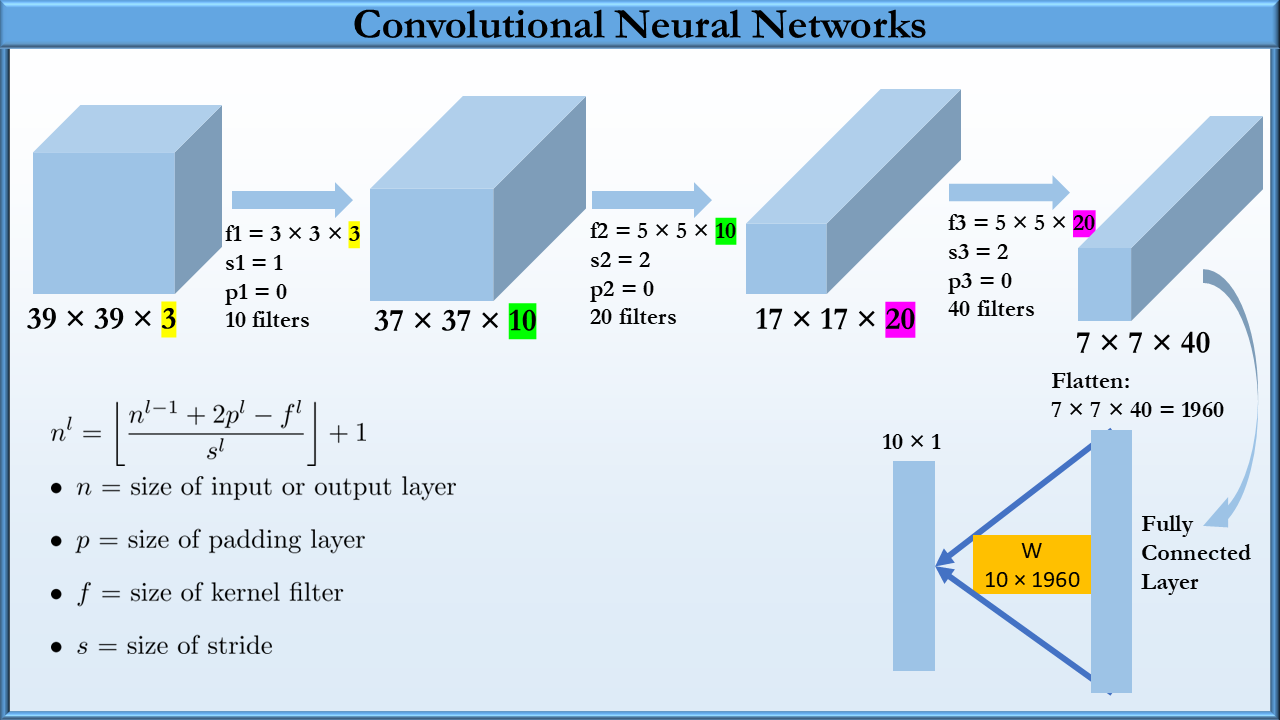

$\textbf{Example: } \text{MNIST image of size 28x28 pixels with 1 channel (grayscale).}$

$\text{Input size: \( 1 \times 28 \times 28 \)}$

$\text{First Convolutional Layer: nn.Conv2d(1, 16, kernel_size=3, padding=1, stride=1)}$

- **Input channels**: 1
- **Output channels**: 16
- **Kernel size**: 3
- **Padding**: 1
- **Stride**: 1


$\textbf{Using the formula for the output size of a convolutional layer:}$

$ \text{Output size} = \frac{(\text{Input size} - \text{Kernel size} + 2 \times \text{Padding})}{\text{Stride}} + 1 \$

$ \text{Output size} = \frac{(28 - 3 + 2 \times 1)}{1} + 1 = 28 \$

- **Output size**: $\ ( 16 \times 28 \times 28 \ )$

$\text{First Max Pooling Layer: nn.MaxPool2d(kernel_size=2, stride=2)}$
- **Kernel size**: 2
- **Stride**: 2

$\ \text{Output size} = \frac{(\text{Input size} - \text{Kernel size})}{\text{Stride}} + 1 \$

$\ \text{Output size} = \frac{(28 - 2)}{2} + 1 = 14 \$

- **Output size**: $\ ( 16 \times 14 \times 14 \ )$

$\Large\textbf{LeNet 5}$

In [ ]:
import copy
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from torchvision import models, datasets, transforms

$\Large\textbf{Loading Training and Testing MNIST data}$

In [ ]:
# transform.Compose takes the list of transformation and apply them in sequence to the images.
transform = transforms.Compose([
                                transforms.ToTensor(),       # Converts the images to PyTorch tensors
                                transforms.Resize((32, 32))  # Resizes the images to 32x32 pixels
                                ])

In [ ]:
trainset = torchvision.datasets.MNIST(
                                        root='./data',  # Directory where the data will be stored
                                        train=True,     # Specifies that this is the training set
                                        download=True,  # Downloads the data if it's not already present
                                        transform=transform
                                    )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16669838.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 517247.29it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4500658.19it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11531797.08it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
testset = torchvision.datasets.MNIST(
                                        root='./data',   # Directory where the data will be stored
                                        train=False,     # Specifies that this is the test set
                                        download=True,   # Downloads the data if it's not already present
                                        transform=transform
                                    )

In [ ]:
labels = trainset.classes
labels

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
# Shape of the image tensor

img, label = trainset[0]
img_shape = img.shape
img_shape, label

(torch.Size([1, 32, 32]), 5)

In [ ]:
print("Max & Min Pixel Values:", "Max:", torch.max(img), "Min:", torch.min(img))
print("Pixel Values for all Channels:\n", img[:, :, :])

Max & Min Pixel Values: Max: tensor(0.9922) Min: tensor(0.)
Pixel Values for all Channels:
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


$\Large\textbf{Splitting the data into test, train and validation dataset}$ \\
Train Data Size = 48000 \
Test Data Size = 10000 \
Validation Data Size = 12000

In [ ]:
print(len(trainset))
print(len(testset))

60000
10000


In [ ]:
train_len, val_len = int(0.8 * len(trainset)), int(0.2 * len(trainset))

trainset, valset = torch.utils.data.random_split(trainset, [train_len, val_len])

$\Large\textbf{Shuffling and creating batches of data}$

In [ ]:
batch_size = 16

train_dataloader = DataLoader(trainset, batch_size=batch_size, drop_last=True, shuffle=True,  num_workers=2)  # num_workers: Number of subprocesses to use
val_dataloader   = DataLoader(valset,   batch_size=batch_size, drop_last=True, shuffle=False, num_workers=2)
test_dataloader  = DataLoader(testset,  batch_size=batch_size, drop_last=True, shuffle=False, num_workers=2)

In [ ]:
print("Training dataset size: "   , len(trainset))
print("Validation dataset size: " , len(valset))
print("Testing dataset size: "    , len(testset))

Training dataset size:  48000
Validation dataset size:  12000
Testing dataset size:  10000


In [ ]:
print("No. of batches in Training dataset : "   , len(train_dataloader))
print("No. of batches in Validation dataset : " , len(val_dataloader))
print("No. of batches in Testing dataset : "    , len(test_dataloader))

No. of batches in Training dataset :  3000
No. of batches in Validation dataset :  750
No. of batches in Testing dataset :  625


$\Large\textbf{Visualising the data}$

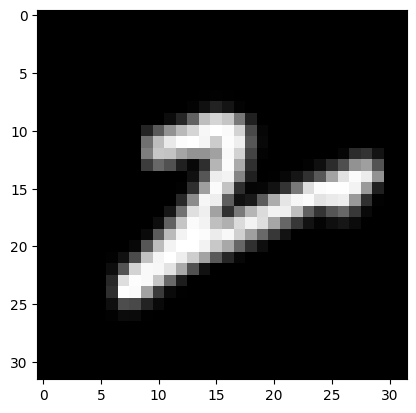

In [ ]:
img, label = trainset[125]
img = img.reshape(32,32)
plt.imshow(img, cmap = 'gray')

Shape of an Image (Batch Size, Channels, Height, Width): torch.Size([16, 1, 32, 32])


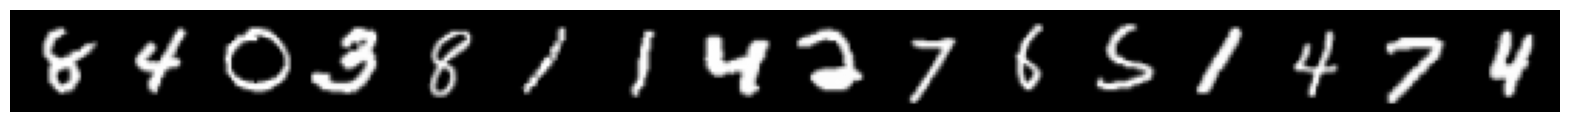

Shape of an Image (Batch Size, Channels, Height, Width): torch.Size([16, 1, 32, 32])


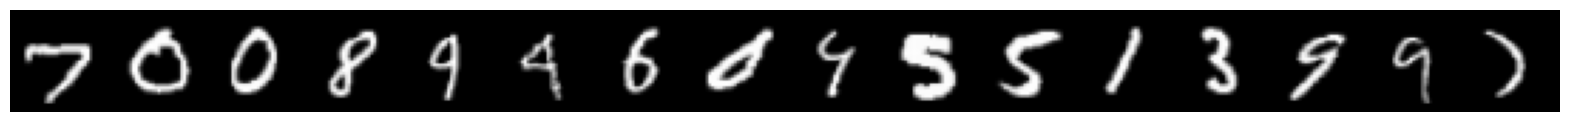

In [ ]:
from torchvision.utils import make_grid

c =  0
for images, _ in train_dataloader:

    print('Shape of an Image (Batch Size, Channels, Height, Width):', images.shape)

    plt.figure(figsize=(20,10))
    plt.axis('off')
    # Display the grid of images
    plt.imshow(make_grid(images, nrow=16, normalize=True).permute((1, 2, 0)))
    plt.show()
    c += 1
    if c == 2:
        break


$\Large\textbf{LeNet5 Architecture}$

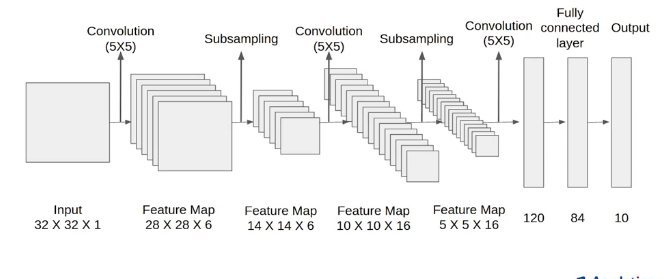

$\textbf{Source:}$ https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/

$\textbf{Output shapes and activation functions of the constituent layers}$

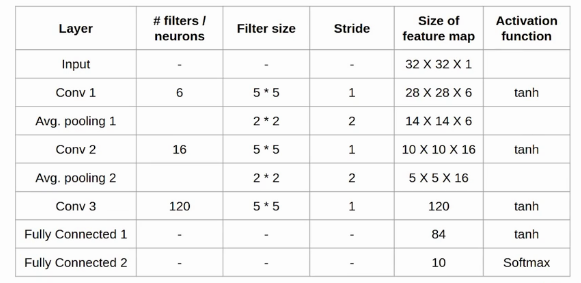

We can use this formula [(W−K+2P)/S]+1 to calculate the output shape of a convolutional or pooling layer.


*   W is the input size
*   K is the Kernel size

*   P is the padding
*   S is the stride

$\Large\textbf{Buliding a LeNet5 Model}$

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()

        self.network = nn.Sequential(

            # Input is 32x32x1
            # First Convolutional Layer
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0), # 6 filters of 5x5x1 and output is 28x28x6
            nn.Tanh(),

            nn.AvgPool2d(kernel_size=2, stride=2),  # Average pooling: output 14x14x6

            # Second Convolutional Layer
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),  # 16 filters of 5x5x6 and output is  10x10x16
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # Average pooling: output 5x5x16

            # Third Convolutional Layer
            nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0),   # 120 filters of 5x5x16 and output is 1x1x120
            nn.Tanh(),

            # Flatten the feature maps for the fully connected layers
            nn.Flatten(),

            nn.Linear(120, 84),           # Second fully connected layer with 84 units
            nn.Tanh(),

            nn.Linear(84, num_classes)    # Output layer with 10 units (one for each class in MNIST)
        )

    def forward(self, x):
        return self.network(x)

In [ ]:
#Initialising the model2
model = LeNet5(10)
print("The overall model is - \n")
print(model)

The overall model is - 

LeNet5(
  (network): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): Tanh()
    (11): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Print model's state_dict
model = model.to(device)

print("Model's state_dict:")

for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

Model's state_dict:
network.0.weight 	 torch.Size([6, 1, 5, 5])
network.0.bias 	 torch.Size([6])
network.3.weight 	 torch.Size([16, 6, 5, 5])
network.3.bias 	 torch.Size([16])
network.6.weight 	 torch.Size([120, 16, 5, 5])
network.6.bias 	 torch.Size([120])
network.9.weight 	 torch.Size([84, 120])
network.9.bias 	 torch.Size([84])
network.11.weight 	 torch.Size([10, 84])
network.11.bias 	 torch.Size([10])


In [ ]:
from torchsummary import summary

summary(model, input_size=(1, 32, 32), batch_size = 16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [16, 6, 28, 28]             156
              Tanh-2            [16, 6, 28, 28]               0
         AvgPool2d-3            [16, 6, 14, 14]               0
            Conv2d-4           [16, 16, 10, 10]           2,416
              Tanh-5           [16, 16, 10, 10]               0
         AvgPool2d-6             [16, 16, 5, 5]               0
            Conv2d-7            [16, 120, 1, 1]          48,120
              Tanh-8            [16, 120, 1, 1]               0
           Flatten-9                  [16, 120]               0
           Linear-10                   [16, 84]          10,164
             Tanh-11                   [16, 84]               0
           Linear-12                   [16, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

$\Large\textbf{Visualizing the Filters (Kernel Filters) before Training the Network}$

Source: https://medium.com/@rabiagondur/feature-extraction-using-cnns-via-pytorch-ed79da32c950#:~:text=In%20this%20article,%20we%20will%20explore%20CNN%20feature%20extraction%20using

In [ ]:
# Defining the function for Visualize filters from a convolutional layer
# Function to visualize the filters
def visualize_filters(weights):
    n_filters = weights.shape[0]
    n_channels = weights.shape[1]

    fig, axes = plt.subplots(n_filters, n_channels, figsize=(n_channels, n_filters))

    # Ensure axes is a 2D array
    if n_filters == 1:
        axes = [axes]
    if n_channels == 1:
        axes = [[ax] for ax in axes]

    for i in range(n_filters):
        for j in range(n_channels):
            ax = axes[i][j]
            ax.imshow(weights[i, j].cpu(), cmap='gray')
            ax.axis('off')

    plt.show()

Layer: Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)), Filter Shape: torch.Size([6, 1, 5, 5])


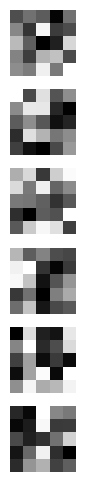

Layer: Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)), Filter Shape: torch.Size([16, 6, 5, 5])


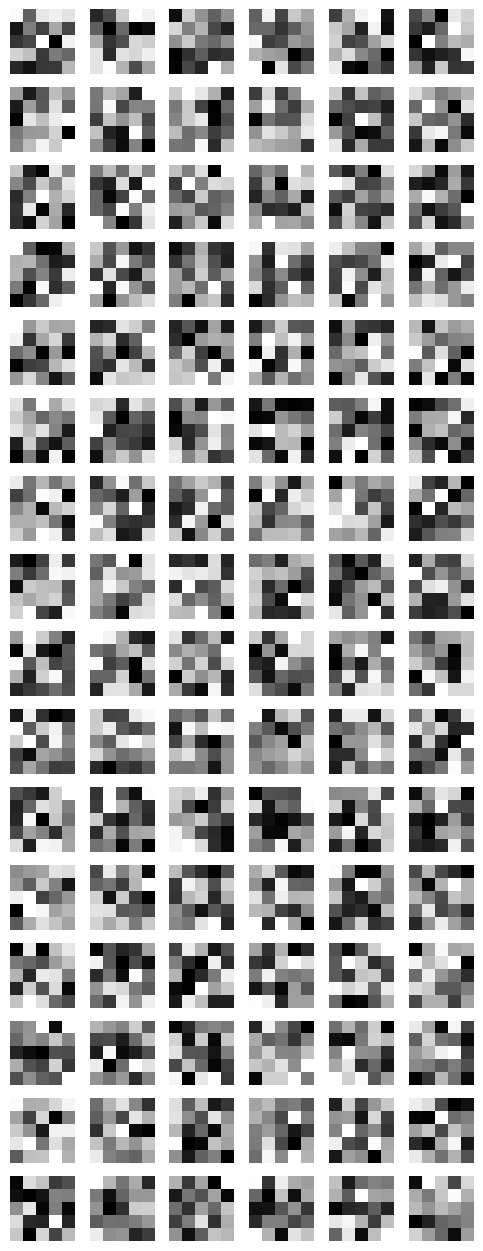

In [ ]:
c = 0

for layer in model.network:

    # Check if the layer is a convolutional layer
    if isinstance(layer, nn.Conv2d):
        c += 1
        # Get the filter weights
        filters = layer.weight.data
        # Print the layer and filter shape
        print(f"Layer: {layer}, Filter Shape: {filters.shape}")

        visualize_filters(filters)
    if c == 2:
        break

$\Large\textbf{Visualizing the Convolution Feature Maps Before Training}$

In [ ]:
# Dictionary to store activations for different layers
activation = {}

# Hook function to store activations
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()  # Store the output (activation) in the dictionary
    return hook

idx = 0
for layer in model.network:

    idx += 1
    if isinstance(layer, nn.Conv2d):


        layer_name = f"Conv2d-{idx}"

        # Check if the layer name already exists in the activation dictionary
        if layer_name not in activation:
            print(f"Registering activation hook for layer: {layer_name}")
            layer.register_forward_hook(get_activation(layer_name))
        else:
            print(f"Layer {layer_name} already has an activation hook registered.")



Registering activation hook for layer: Conv2d-1
Registering activation hook for layer: Conv2d-4
Registering activation hook for layer: Conv2d-7


In [ ]:
# Visualize the feature maps of a specific layer

def visualize_feature_maps(activation, layer_name, image_idx):

    feature_maps = activation[layer_name].cpu().numpy()  # (batch_size, num_filters, height, width)

    batch_size, num_filters, height, width = feature_maps.shape

    fig, axes = plt.subplots(1, num_filters, figsize=(20, 20))
    for i in range(num_filters):
        feature_map = feature_maps[image_idx, i, :, :]  # Extract the i-th feature map for a specific image in the batch
        axes[i].imshow(feature_map, cmap='gray')
        axes[i].axis('off')
    plt.show()

In [ ]:
activation.keys()

dict_keys([])

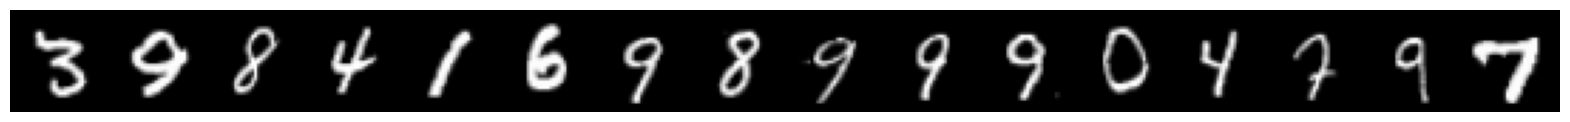

Visualizing feature maps for Image 1 in the batch
Feature Maps from Conv2d-1 for Image 0:


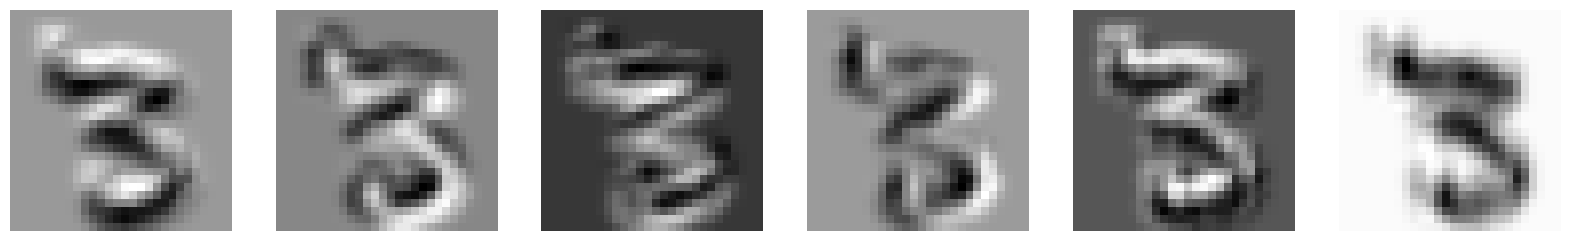

Feature Maps from Conv2d-4 for Image 0:


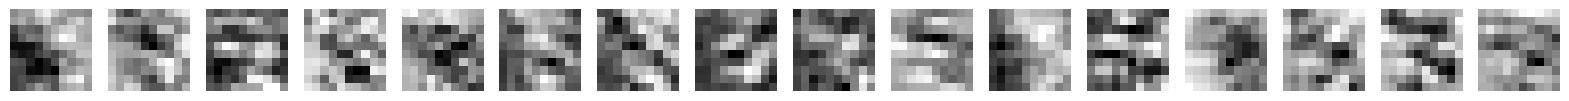

Feature Maps from Conv2d-7 for Image 0:


Visualizing feature maps for Image 2 in the batch
Feature Maps from Conv2d-1 for Image 1:


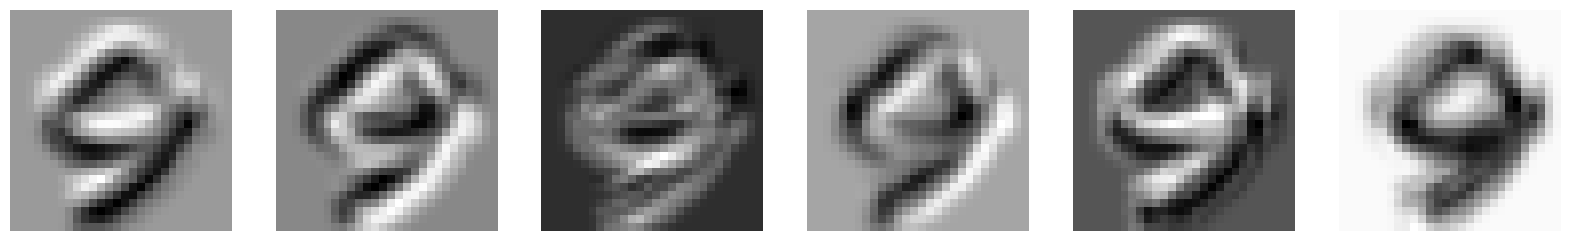

Feature Maps from Conv2d-4 for Image 1:


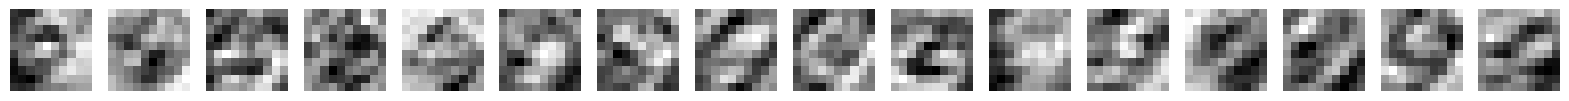

Feature Maps from Conv2d-7 for Image 1:


Visualizing feature maps for Image 3 in the batch
Feature Maps from Conv2d-1 for Image 2:


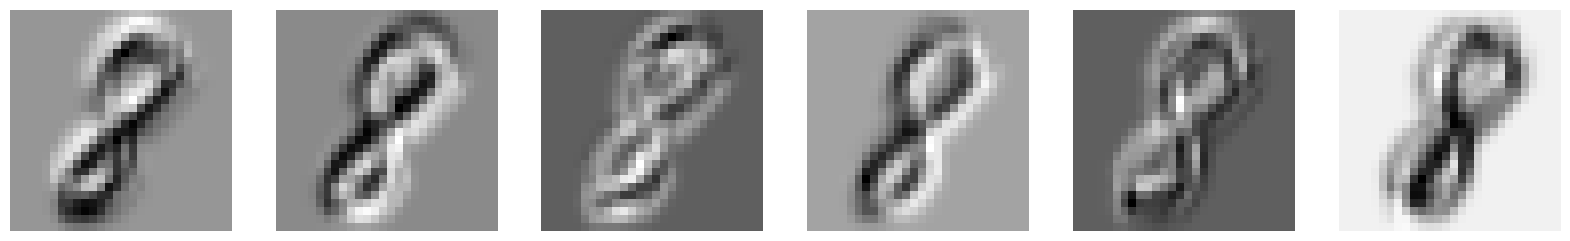

Feature Maps from Conv2d-4 for Image 2:


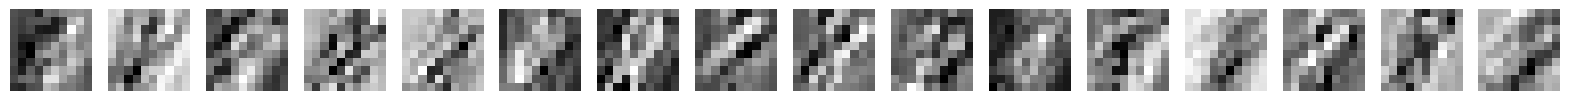

Feature Maps from Conv2d-7 for Image 2:


Visualizing feature maps for Image 4 in the batch
Feature Maps from Conv2d-1 for Image 3:


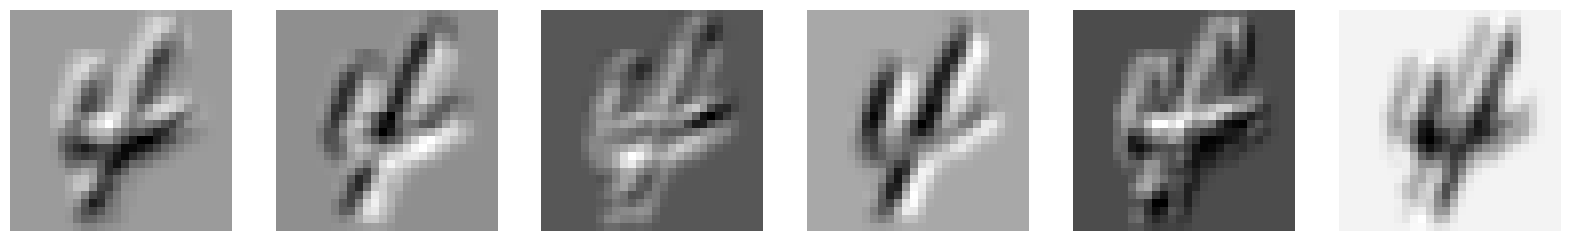

Feature Maps from Conv2d-4 for Image 3:


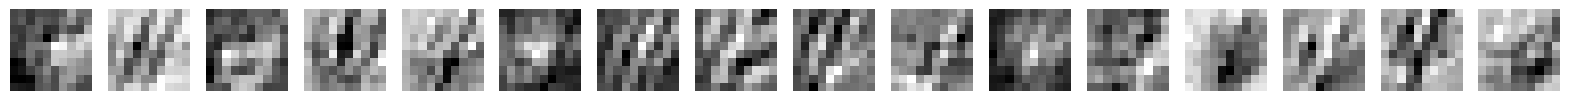

Feature Maps from Conv2d-7 for Image 3:


Visualizing feature maps for Image 5 in the batch
Feature Maps from Conv2d-1 for Image 4:


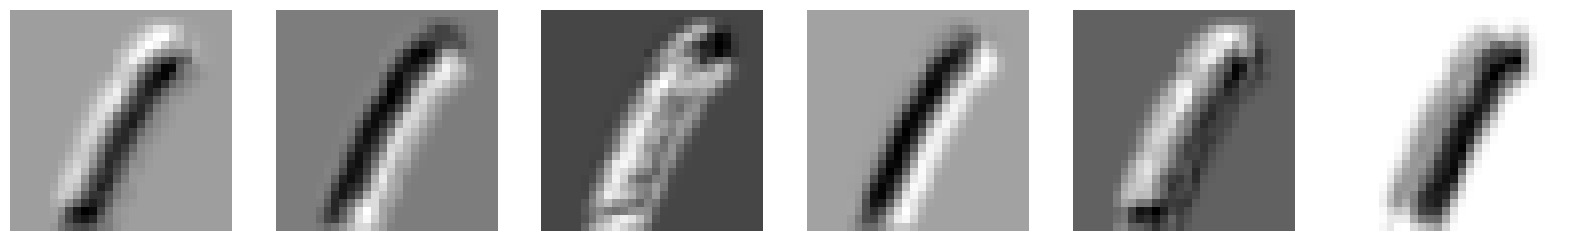

Feature Maps from Conv2d-4 for Image 4:


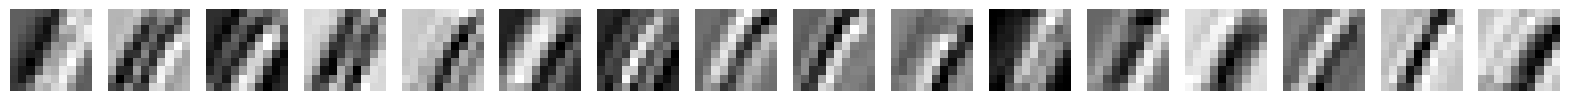

Feature Maps from Conv2d-7 for Image 4:


Visualizing feature maps for Image 6 in the batch
Feature Maps from Conv2d-1 for Image 5:


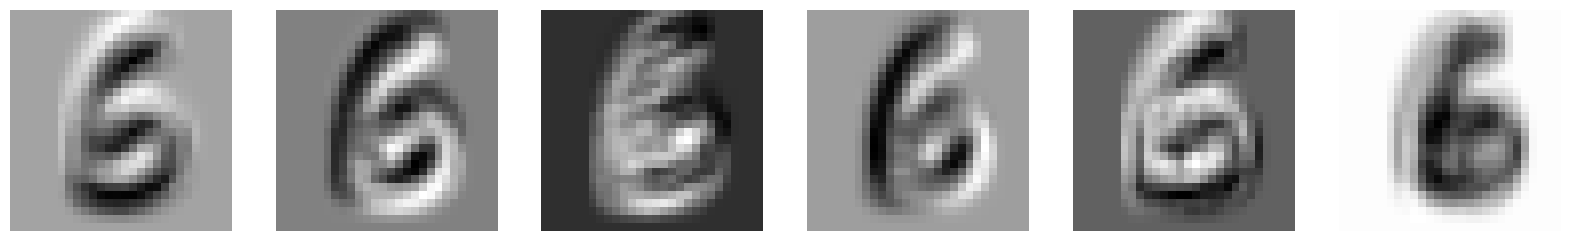

Feature Maps from Conv2d-4 for Image 5:


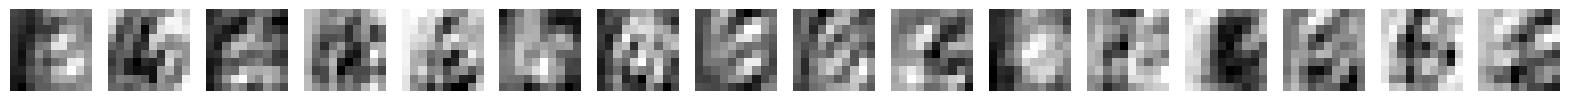

Feature Maps from Conv2d-7 for Image 5:


Visualizing feature maps for Image 7 in the batch
Feature Maps from Conv2d-1 for Image 6:


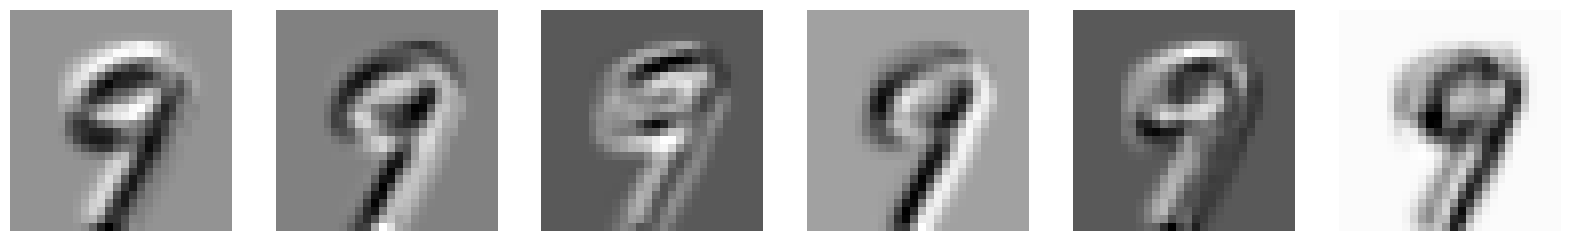

Feature Maps from Conv2d-4 for Image 6:


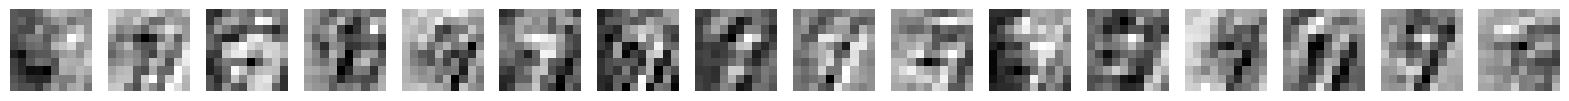

Feature Maps from Conv2d-7 for Image 6:


Visualizing feature maps for Image 8 in the batch
Feature Maps from Conv2d-1 for Image 7:


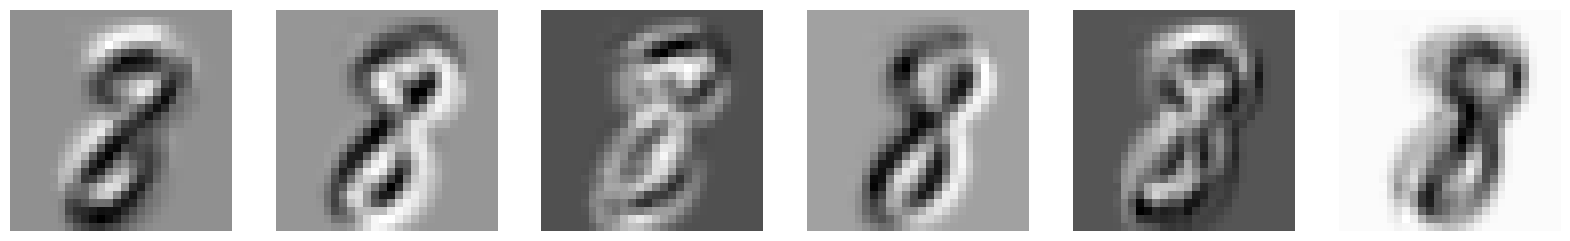

Feature Maps from Conv2d-4 for Image 7:


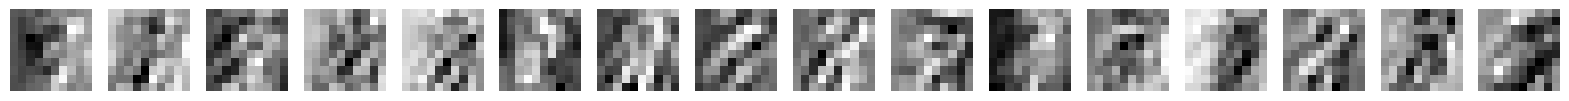

Feature Maps from Conv2d-7 for Image 7:


Visualizing feature maps for Image 9 in the batch
Feature Maps from Conv2d-1 for Image 8:


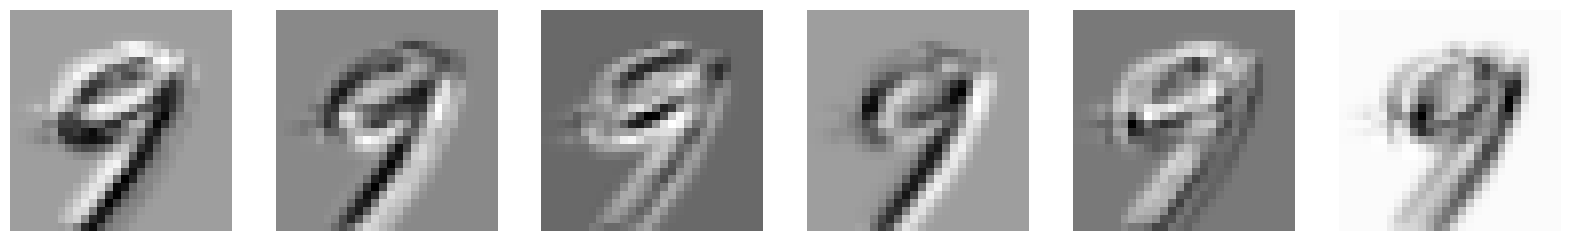

Feature Maps from Conv2d-4 for Image 8:


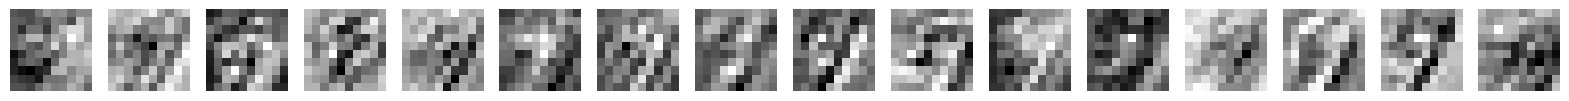

Feature Maps from Conv2d-7 for Image 8:


Visualizing feature maps for Image 10 in the batch
Feature Maps from Conv2d-1 for Image 9:


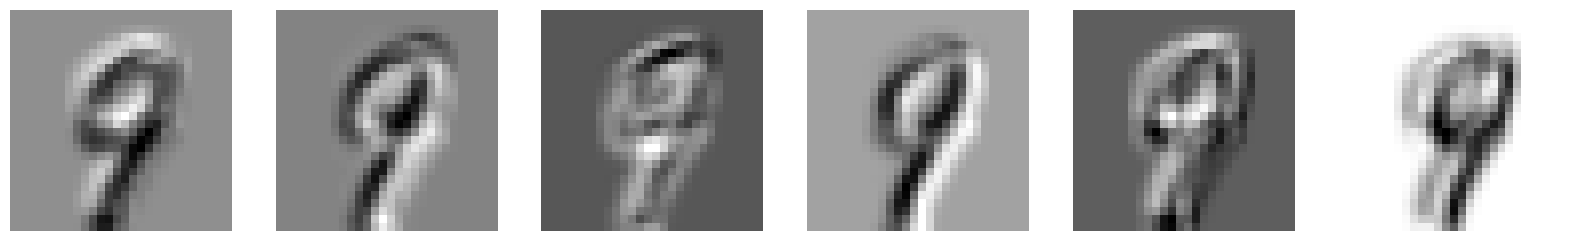

Feature Maps from Conv2d-4 for Image 9:


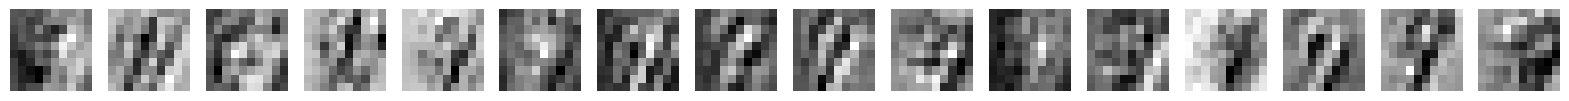

Feature Maps from Conv2d-7 for Image 9:


Visualizing feature maps for Image 11 in the batch
Feature Maps from Conv2d-1 for Image 10:


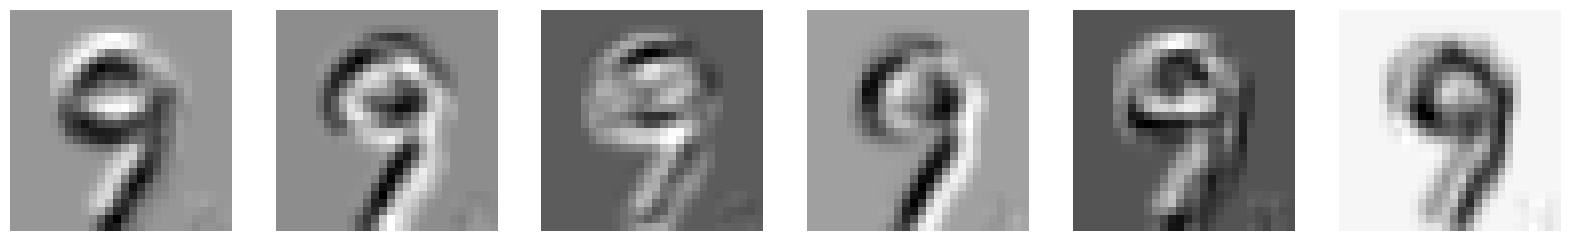

Feature Maps from Conv2d-4 for Image 10:


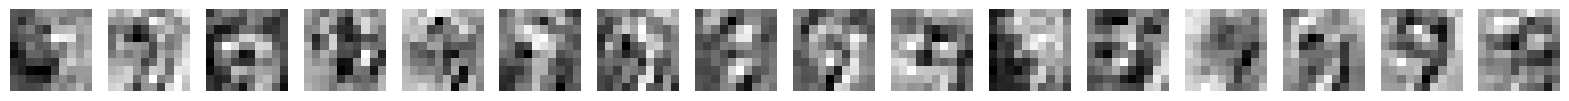

Feature Maps from Conv2d-7 for Image 10:


Visualizing feature maps for Image 12 in the batch
Feature Maps from Conv2d-1 for Image 11:


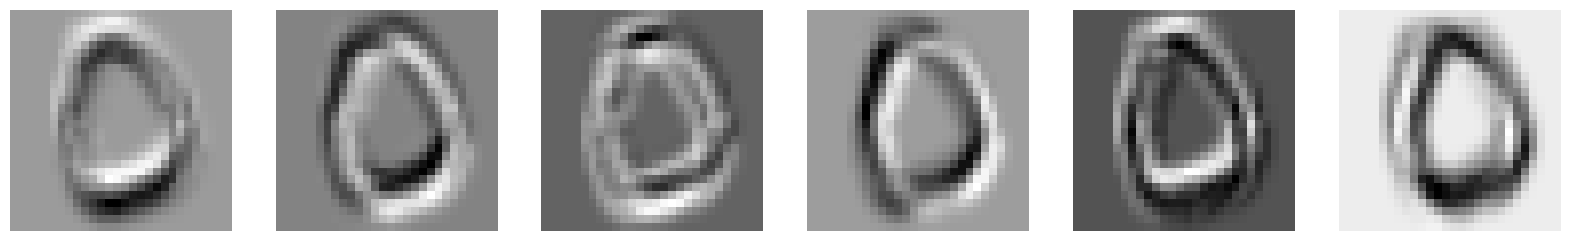

Feature Maps from Conv2d-4 for Image 11:


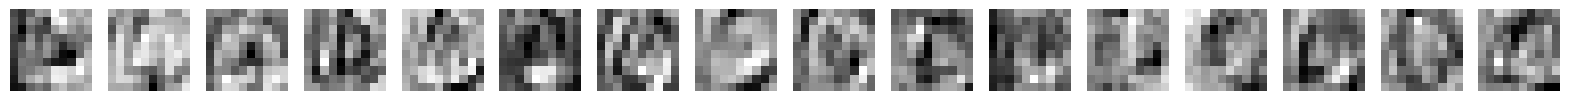

Feature Maps from Conv2d-7 for Image 11:


Visualizing feature maps for Image 13 in the batch
Feature Maps from Conv2d-1 for Image 12:


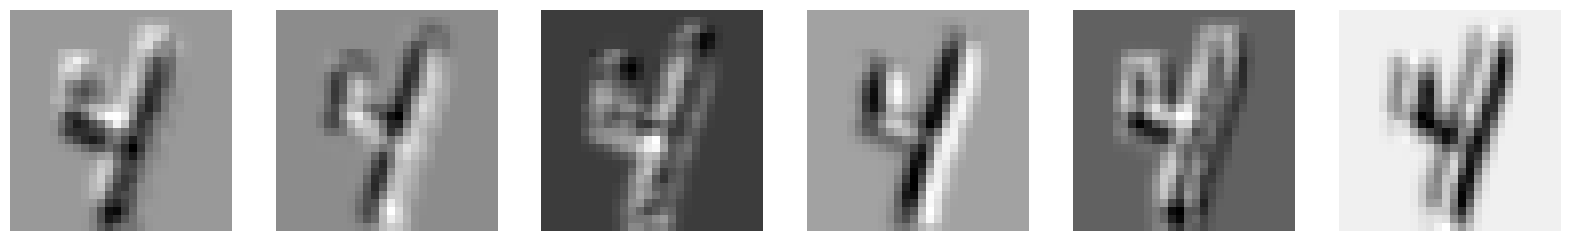

Feature Maps from Conv2d-4 for Image 12:


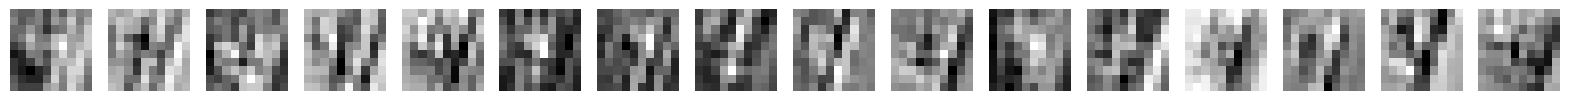

Feature Maps from Conv2d-7 for Image 12:


Visualizing feature maps for Image 14 in the batch
Feature Maps from Conv2d-1 for Image 13:


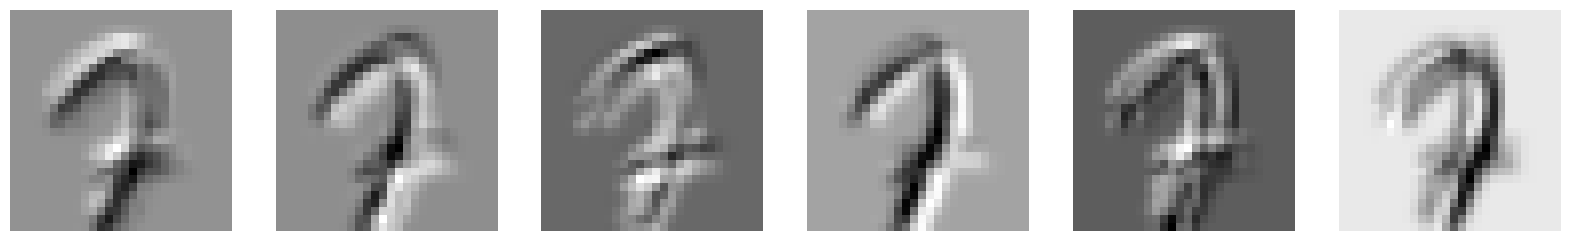

Feature Maps from Conv2d-4 for Image 13:


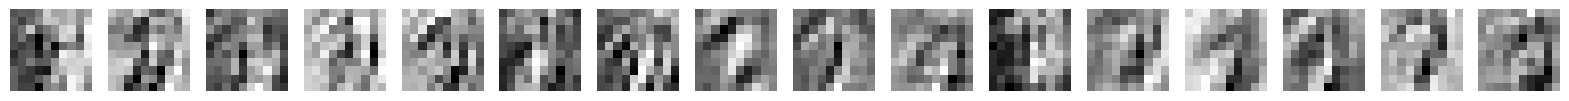

Feature Maps from Conv2d-7 for Image 13:


Visualizing feature maps for Image 15 in the batch
Feature Maps from Conv2d-1 for Image 14:


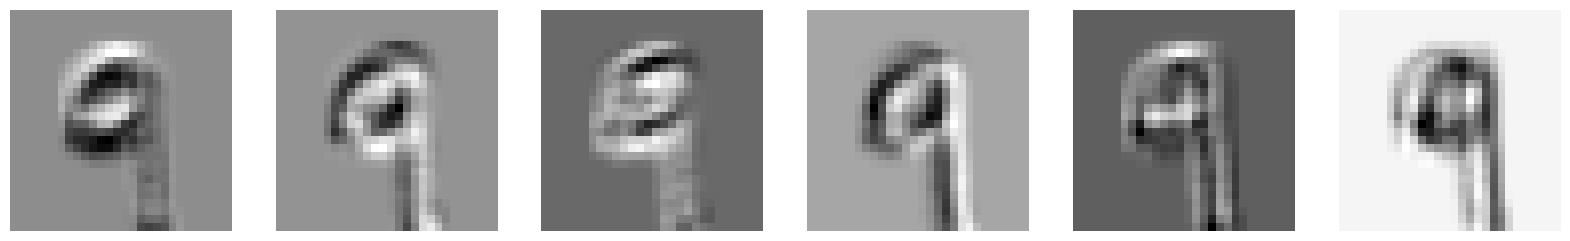

Feature Maps from Conv2d-4 for Image 14:


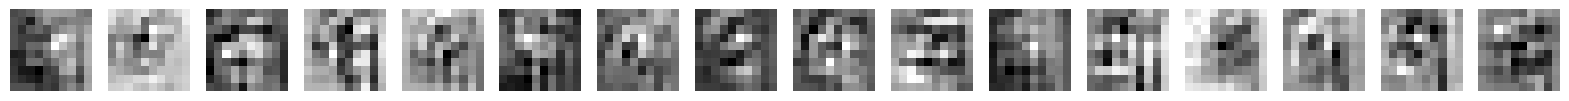

Feature Maps from Conv2d-7 for Image 14:


Visualizing feature maps for Image 16 in the batch
Feature Maps from Conv2d-1 for Image 15:


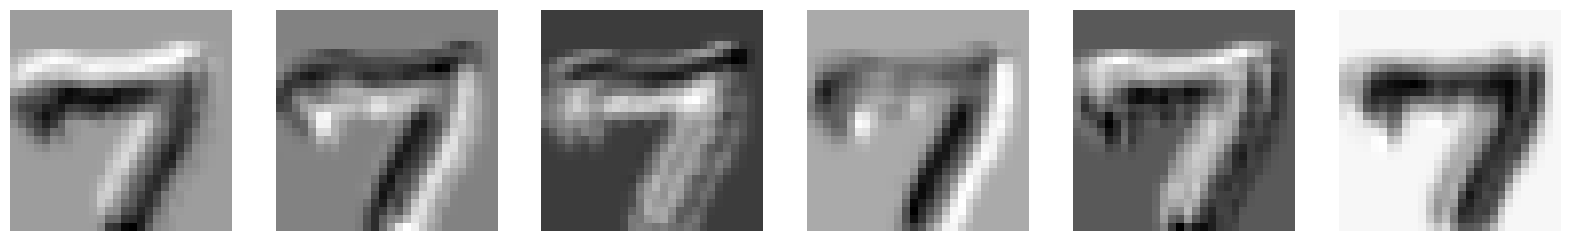

Feature Maps from Conv2d-4 for Image 15:


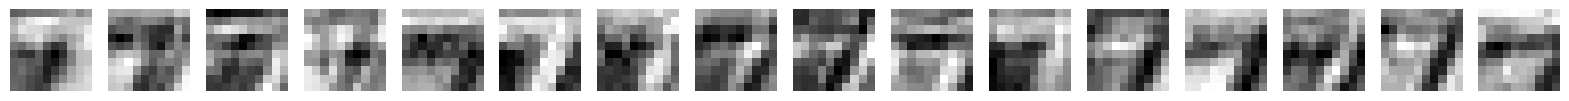

Feature Maps from Conv2d-7 for Image 15:


In [ ]:
for images, _ in train_dataloader:

    # Print the batch
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16, normalize=True).permute((1, 2, 0)))
    plt.show()

    images = images.to(device)
    # Forward pass to generate feature maps
    output = model(images).to(device)

    # Iterate through each image in the batch

    for idx in range(images.shape[0]):
        print(f"Visualizing feature maps for Image {idx + 1} in the batch")

        for c in activation:
            # Visualize feature maps from the first convolutional layer
            print(f"Feature Maps from {c} for Image {idx}:")
            visualize_feature_maps(activation, c, image_idx=idx)

    break  # Stop after visualizing one batch

$\Large\textbf{Training}$

In [ ]:
CE = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

In [ ]:
num_epochs = 50
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()
best_val_loss = 1000
total_train = 0
correct_train = 0
total_val = 0
correct_val = 0
count = 0

from tqdm import tqdm

for epoch in range(num_epochs):
    total_train_loss = 0
    total_val_loss = 0
    total_train = 0
    correct_train = 0
    model.train()
    total_p = 0

    # training
    for itr, (image, label) in tqdm(enumerate(train_dataloader)):

        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()

        pred = model(image)
        # print(label.shape, pred.shape)
        loss = CE(pred, label)
        total_train_loss += loss.item()

        #ADDED HERE
        predicted = torch.argmax(pred, 1)
        total_train += label.size(0)
        #print(predicted, label)
        correct_train += (predicted == label).sum().item()
        #print("correct train = ",correct_train)

        loss.backward()
        optimizer.step()
        # print(itr+1, "Train Batch complete")

    accuracy_train = (100 * correct_train) / total_train
    #print(total_train)
    train_accuracy.append(accuracy_train)
    total_train_loss = total_train_loss / (itr + 1)
    train_loss.append(total_train_loss)


    # validation
    model.eval()
    total_val = 0
    correct_val = 0
    for itr, (image, label) in enumerate(val_dataloader):

        image = image.to(device)
        label = label.to(device)

        pred = model(image)

        loss = CE(pred, label)
        total_val_loss += loss.item()

        predicted = torch.argmax(pred,dim = 1)
        total_val += label.size(0)
        correct_val += (predicted == label).sum().item()
        # print("correct test = ",correct_val)
        # print(itr+1, "Test Batch complete")


    accuracy = (100 * correct_val) / total_val
    val_accuracy.append(accuracy)

    total_val_loss = total_val_loss / (itr + 1)
    val_loss.append(total_val_loss)

    print('\nEpoch: {}/{}, Train Loss: {:.8f},Train Accuracy: {:.8f}, Val Loss: {:.8f}, Val Accuracy: {:.8f}'.format(epoch + 1, num_epochs, total_train_loss,accuracy_train, total_val_loss, accuracy))

    if total_val_loss < best_val_loss:
      count = 0
      best_val_loss = total_val_loss
      print("Saving the model state dictionary for Epoch: {} with Validation loss: {:.8f}".format(epoch + 1, total_val_loss))
      torch.save(model.state_dict(), "model.dth")
    else:
      count = count + 1
    if count == 5:
        break

3000it [00:24, 123.81it/s]



Epoch: 1/50, Train Loss: 0.23665674,Train Accuracy: 92.92500000, Val Loss: 0.11899026, Val Accuracy: 96.55833333
Saving the model state dictionary for Epoch: 1 with Validation loss: 0.11899026


3000it [00:23, 126.84it/s]



Epoch: 2/50, Train Loss: 0.10098633,Train Accuracy: 96.96458333, Val Loss: 0.10241540, Val Accuracy: 97.00000000
Saving the model state dictionary for Epoch: 2 with Validation loss: 0.10241540


3000it [00:22, 133.40it/s]



Epoch: 3/50, Train Loss: 0.08463244,Train Accuracy: 97.39375000, Val Loss: 0.08895550, Val Accuracy: 97.28333333
Saving the model state dictionary for Epoch: 3 with Validation loss: 0.08895550


3000it [00:23, 128.90it/s]



Epoch: 4/50, Train Loss: 0.07811373,Train Accuracy: 97.65416667, Val Loss: 0.07741841, Val Accuracy: 97.77500000
Saving the model state dictionary for Epoch: 4 with Validation loss: 0.07741841


3000it [00:38, 77.43it/s] 



Epoch: 5/50, Train Loss: 0.07365881,Train Accuracy: 97.70625000, Val Loss: 0.06562599, Val Accuracy: 98.12500000
Saving the model state dictionary for Epoch: 5 with Validation loss: 0.06562599


3000it [00:36, 82.14it/s]



Epoch: 6/50, Train Loss: 0.06953768,Train Accuracy: 97.86666667, Val Loss: 0.08415692, Val Accuracy: 97.62500000


3000it [00:23, 128.03it/s]



Epoch: 7/50, Train Loss: 0.06969058,Train Accuracy: 97.89375000, Val Loss: 0.06320175, Val Accuracy: 98.31666667
Saving the model state dictionary for Epoch: 7 with Validation loss: 0.06320175


3000it [00:23, 126.27it/s]



Epoch: 8/50, Train Loss: 0.06602660,Train Accuracy: 97.97291667, Val Loss: 0.09133015, Val Accuracy: 97.06666667


3000it [00:22, 133.71it/s]



Epoch: 9/50, Train Loss: 0.06423132,Train Accuracy: 98.07083333, Val Loss: 0.07234389, Val Accuracy: 97.83333333


3000it [00:25, 117.37it/s]



Epoch: 10/50, Train Loss: 0.06156281,Train Accuracy: 98.05416667, Val Loss: 0.09538068, Val Accuracy: 97.11666667


3000it [00:23, 127.34it/s]



Epoch: 11/50, Train Loss: 0.06203846,Train Accuracy: 98.07500000, Val Loss: 0.07238985, Val Accuracy: 97.74166667


3000it [00:23, 127.44it/s]



Epoch: 12/50, Train Loss: 0.06015558,Train Accuracy: 98.19166667, Val Loss: 0.06920452, Val Accuracy: 97.95000000


In [ ]:
def TabularFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(1,epochs+1):
    ep.append(i)
  return pd.DataFrame(list(zip(ep,train_cost,train_acc,eval_cost,eval_acc)),
                      columns = ['Epoch Value','Training Loss','Training Accuracy','Validation loss','Validation Accuracy'])

In [ ]:
pd = TabularFormat(num_epochs, train_loss, train_accuracy, val_loss, val_accuracy)
pd

,Epoch Value,Training Loss,Training Accuracy,Validation loss,Validation Accuracy
0,1,0.236657,92.925000,0.118990,96.558333
1,2,0.100986,96.964583,0.102415,97.000000
2,3,0.084632,97.393750,0.088956,97.283333
3,4,0.078114,97.654167,0.077418,97.775000
4,5,0.073659,97.706250,0.065626,98.125000
5,6,0.069538,97.866667,0.084157,97.625000
6,7,0.069691,97.893750,0.063202,98.316667
7,8,0.066027,97.972917,0.091330,97.066667
8,9,0.064231,98.070833,0.072344,97.833333
9,10,0.061563,98.054167,0.095381,97.116667


In [ ]:
def GraphicalFormat(epochs,train_cost,train_acc,eval_cost,eval_acc):
  ep = []
  for i in range(len(train_cost)):
    ep.append(i+1)

  plt.figure(figsize =(12,7))
  plt.plot(ep,eval_cost,label = "Evaluation Loss")
  plt.plot(ep,train_cost,label = "Training Loss")
  plt.ylabel("Loss",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between value of Trainig and Validation Loss V/s Epochs",fontsize = 15)
  plt.show()
  print("\n\n__________________________________________________\n\n")

  plt.figure(figsize =(12,7))
  plt.plot(ep,train_acc,label = "Training Accuracy")
  plt.plot(ep,eval_acc,label = "Val Accuracy")
  plt.ylabel("Accuracy",fontsize = 15)
  plt.xlabel("No. of Epoch",fontsize = 15)
  plt.legend(fontsize = 12,loc = "best")
  plt.title("Graph between Trainig and Validation Accuracy V/s Epochs",fontsize = 15)
  plt.show()

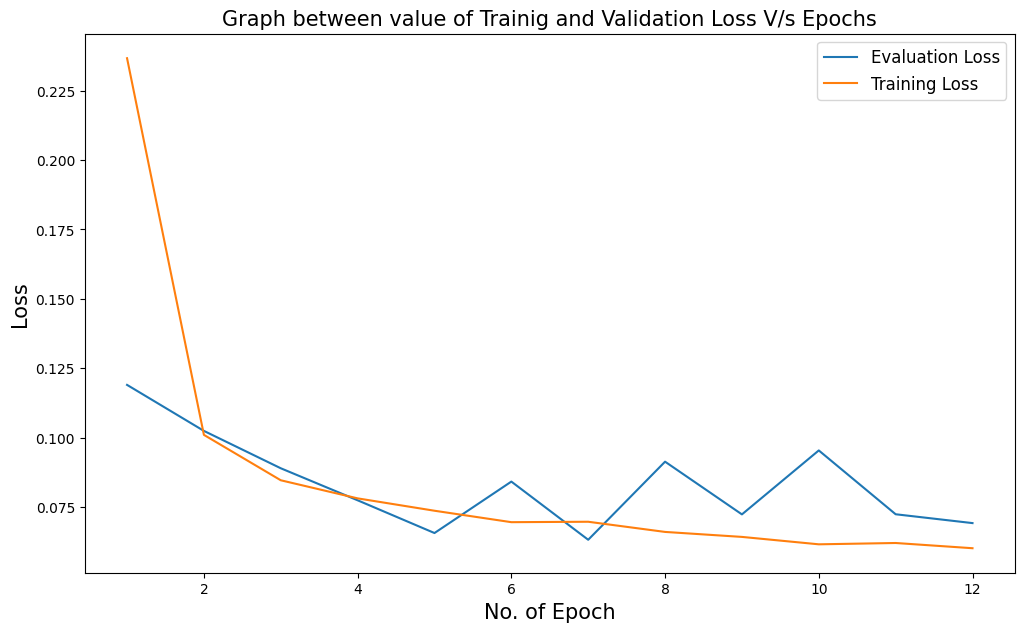



__________________________________________________




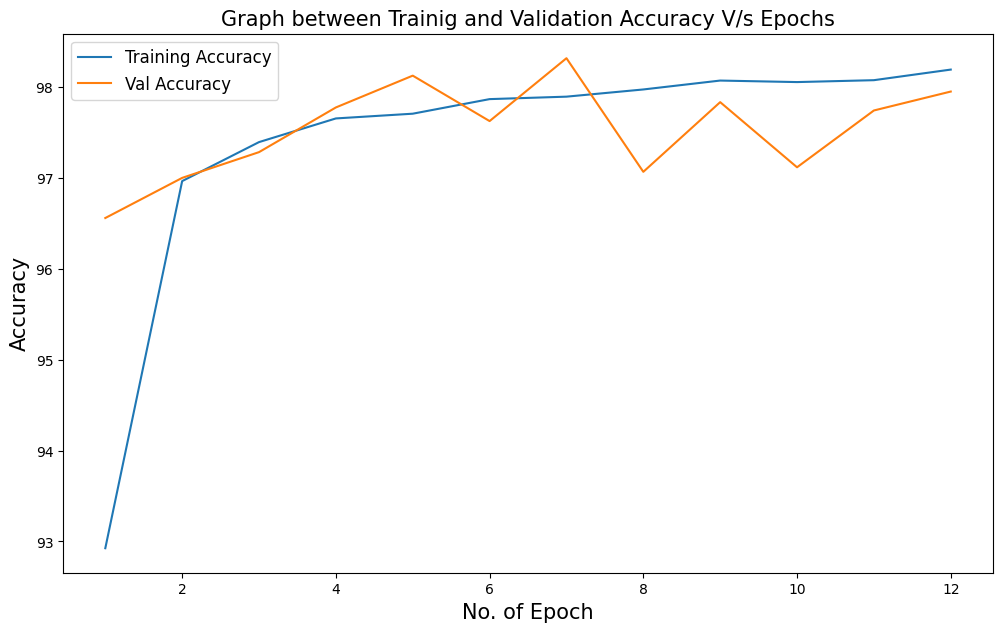

In [ ]:
GraphicalFormat(num_epochs, train_loss, train_accuracy, val_loss, val_accuracy)

$\Large\textbf{Load the trained model}$

In [ ]:
model = LeNet5(10)
model = model.to(device)
checkpoint = torch.load('/content/model.dth')
model.load_state_dict(checkpoint)

<ipython-input-46-14b83b0b57fe>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('/content/model.dth')


<All keys matched successfully>

$\Large\textbf{Visualizing the Filters (Kernel filters) After Training}$

Layer: Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1)), Filter Shape: torch.Size([6, 1, 5, 5])


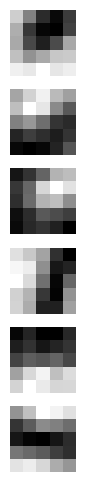

Layer: Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)), Filter Shape: torch.Size([16, 6, 5, 5])


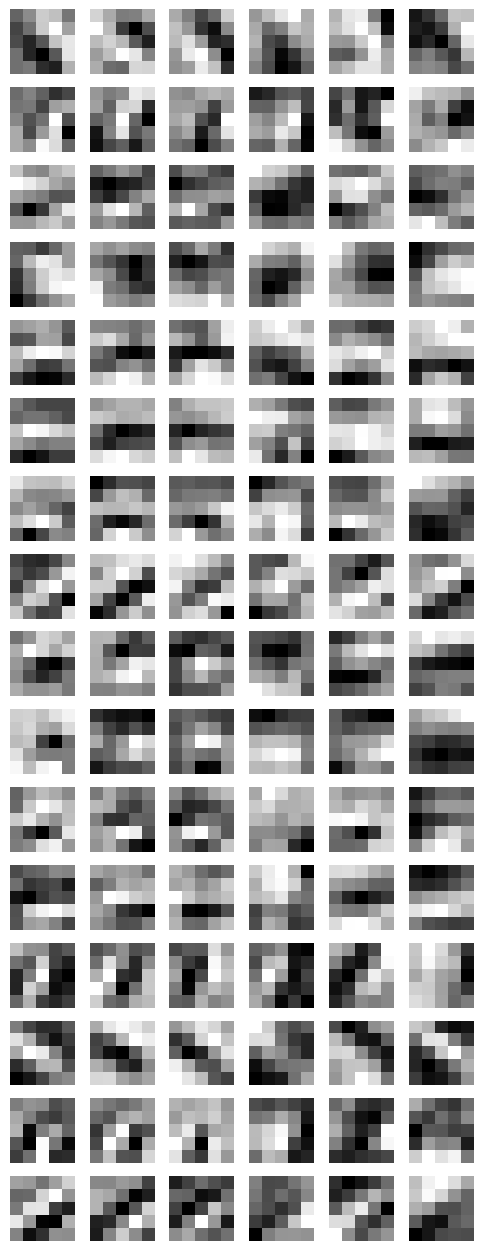

In [ ]:
c = 0
for layer in model.network:

    # Check if the layer is a convolutional layer
    if isinstance(layer, nn.Conv2d):

        c += 1
        # Get the filter weights
        filters = layer.weight.data  # Convert to NumPy for visualization
        # Print the layer and filter shape
        print(f"Layer: {layer}, Filter Shape: {filters.shape}")

        visualize_filters(filters)

    if c == 2:
        break

$\Large\textbf{Visualizing the Convolution Feature Maps After Training}$

In [ ]:
# Dictionary to store activations for different layers
activation = {}

# Hook function to store activations
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()  # Store the output (activation) in the dictionary
    return hook

idx = 0
for layer in model.network:

    idx += 1
    if isinstance(layer, nn.Conv2d):


        layer_name = f"Conv2d-{idx}"

        # Check if the layer name already exists in the activation dictionary
        if layer_name not in activation:
            print(f"Registering activation hook for layer: {layer_name}")
            layer.register_forward_hook(get_activation(layer_name))
        else:
            print(f"Layer {layer_name} already has an activation hook registered.")



Registering activation hook for layer: Conv2d-1
Registering activation hook for layer: Conv2d-4
Registering activation hook for layer: Conv2d-7


In [ ]:
# Visualize the feature maps of a specific layer

def visualize_feature_maps(activation, layer_name, image_idx):

    feature_maps = activation[layer_name].cpu().numpy()  # (batch_size, num_filters, height, width)

    batch_size, num_filters, height, width = feature_maps.shape

    fig, axes = plt.subplots(1, num_filters, figsize=(20, 20))
    for i in range(num_filters):
        feature_map = feature_maps[image_idx, i, :, :]  # Extract the i-th feature map for a specific image in the batch
        axes[i].imshow(feature_map, cmap='gray')
        axes[i].axis('off')
    plt.show()

In [ ]:
activation.keys()

dict_keys([])

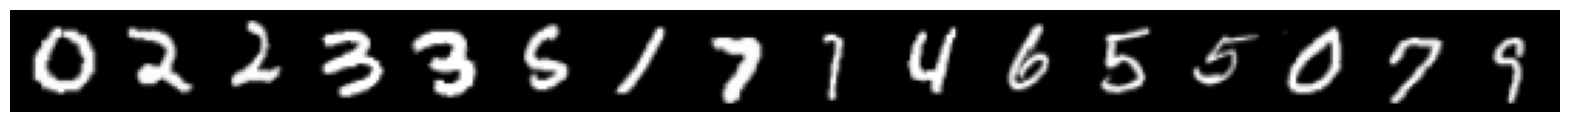

Visualizing feature maps for Image 1 in the batch
Feature Maps from Conv2d-1 for Image 1:


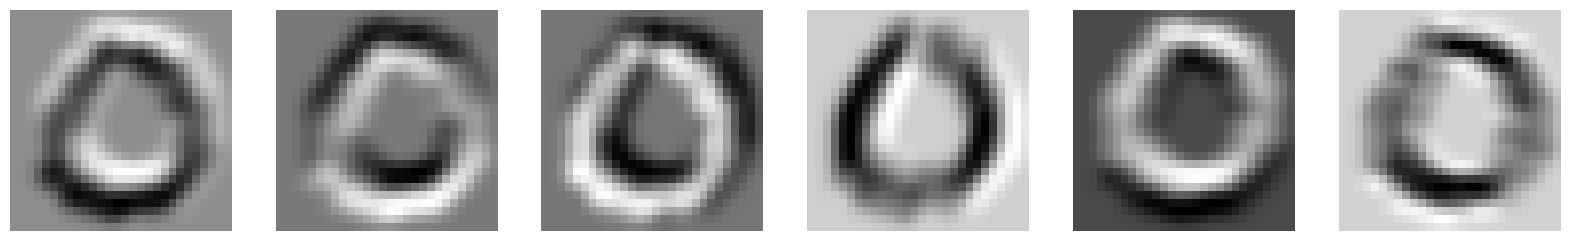

Feature Maps from Conv2d-4 for Image 1:


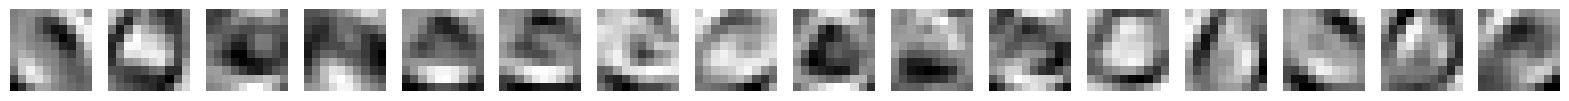

Feature Maps from Conv2d-7 for Image 1:


Visualizing feature maps for Image 2 in the batch
Feature Maps from Conv2d-1 for Image 2:


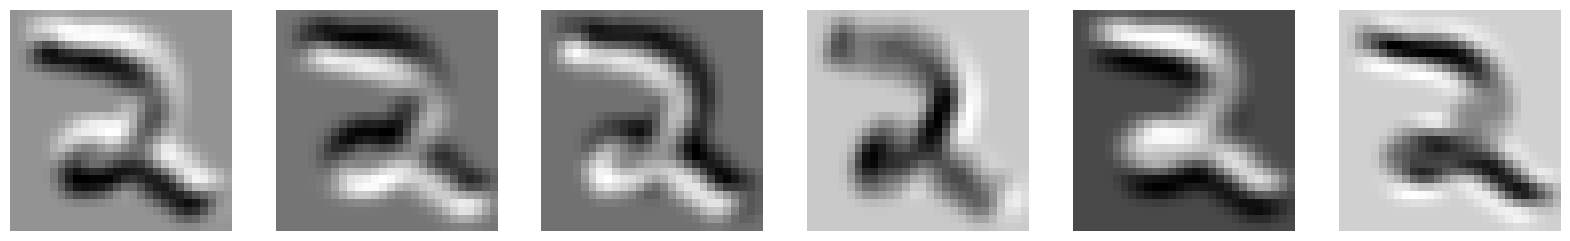

Feature Maps from Conv2d-4 for Image 2:


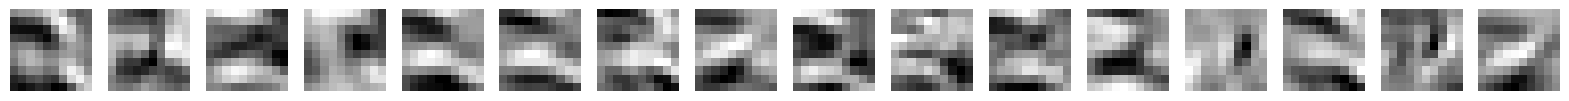

Feature Maps from Conv2d-7 for Image 2:


Visualizing feature maps for Image 3 in the batch
Feature Maps from Conv2d-1 for Image 3:


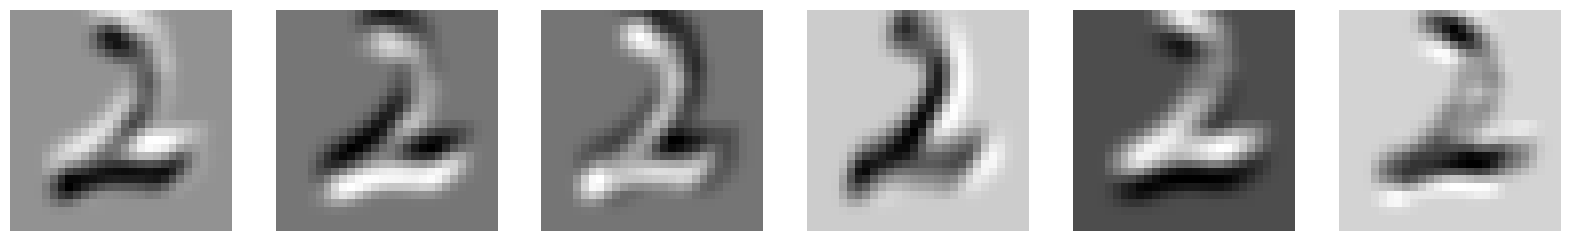

Feature Maps from Conv2d-4 for Image 3:


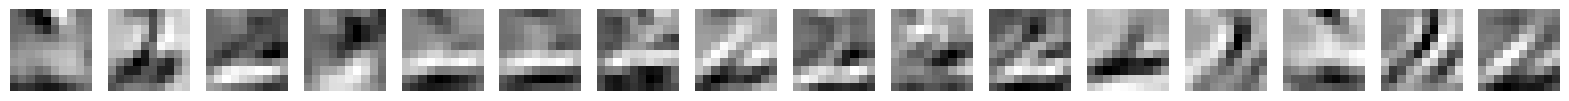

Feature Maps from Conv2d-7 for Image 3:


Visualizing feature maps for Image 4 in the batch
Feature Maps from Conv2d-1 for Image 4:


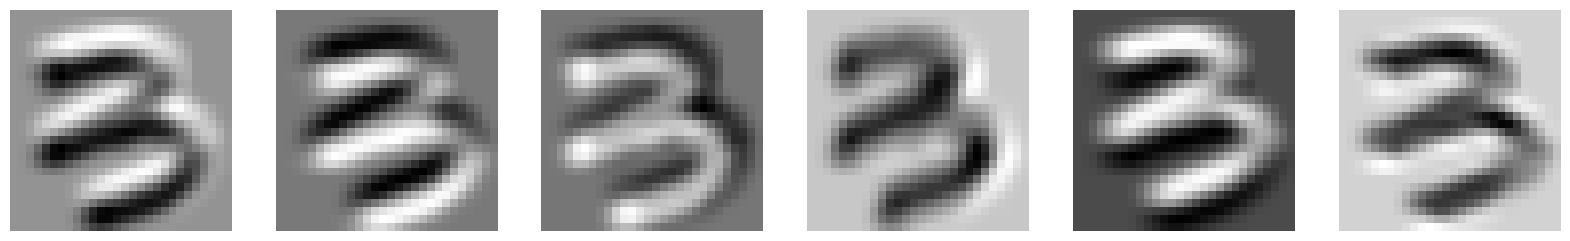

Feature Maps from Conv2d-4 for Image 4:


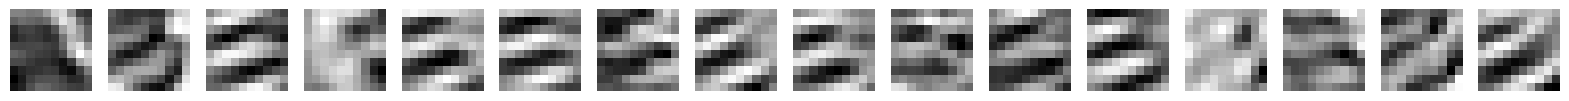

Feature Maps from Conv2d-7 for Image 4:


Visualizing feature maps for Image 5 in the batch
Feature Maps from Conv2d-1 for Image 5:


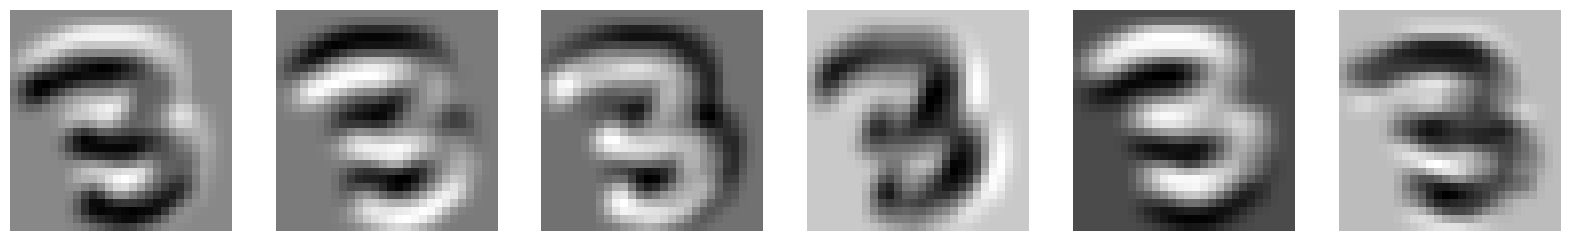

Feature Maps from Conv2d-4 for Image 5:


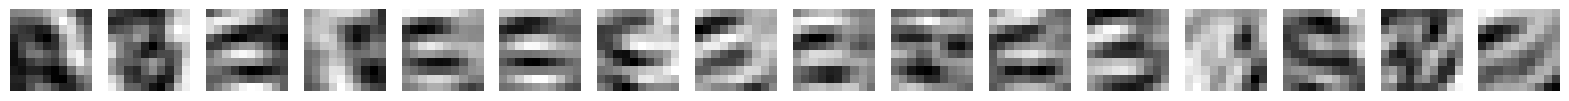

Feature Maps from Conv2d-7 for Image 5:


Visualizing feature maps for Image 6 in the batch
Feature Maps from Conv2d-1 for Image 6:


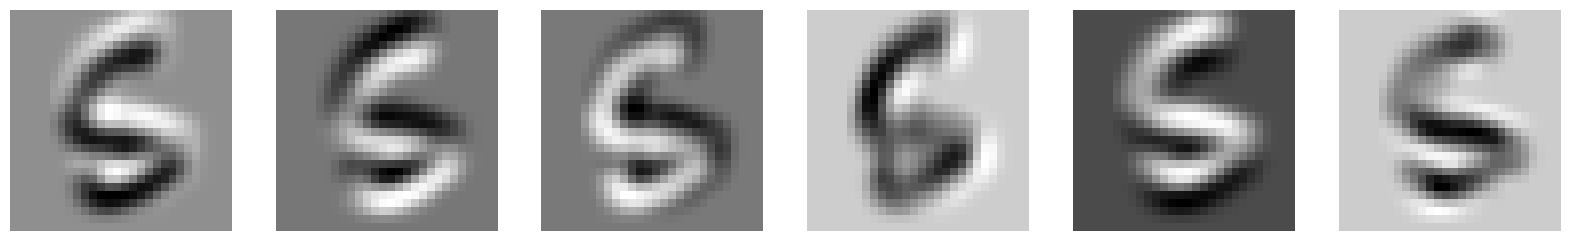

Feature Maps from Conv2d-4 for Image 6:


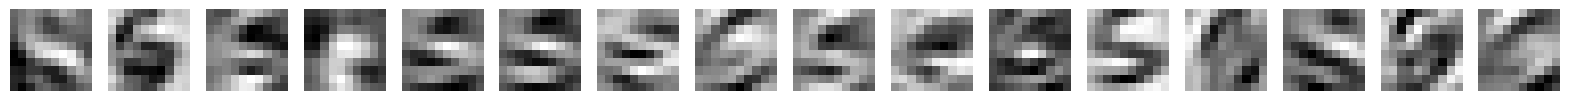

Feature Maps from Conv2d-7 for Image 6:


Visualizing feature maps for Image 7 in the batch
Feature Maps from Conv2d-1 for Image 7:


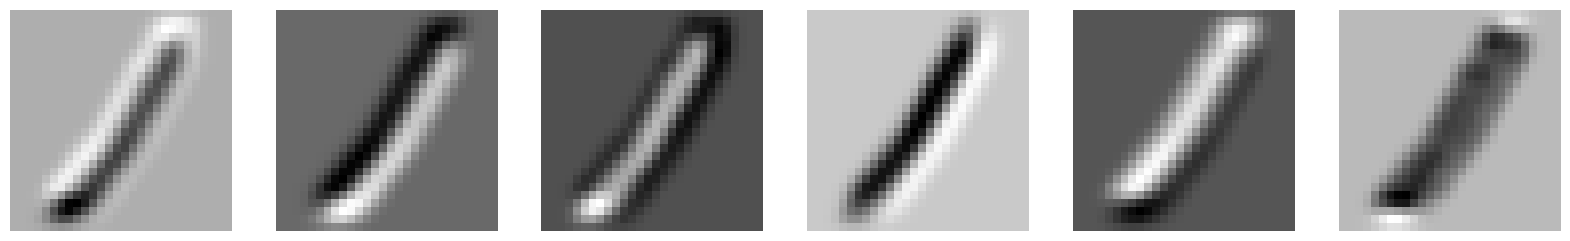

Feature Maps from Conv2d-4 for Image 7:


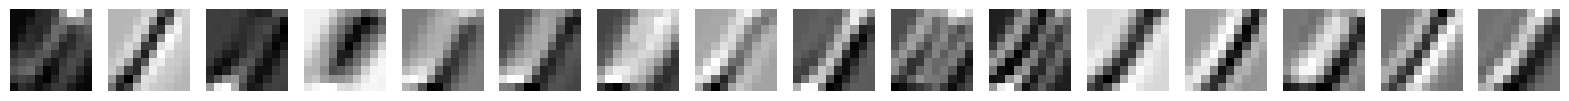

Feature Maps from Conv2d-7 for Image 7:


Visualizing feature maps for Image 8 in the batch
Feature Maps from Conv2d-1 for Image 8:


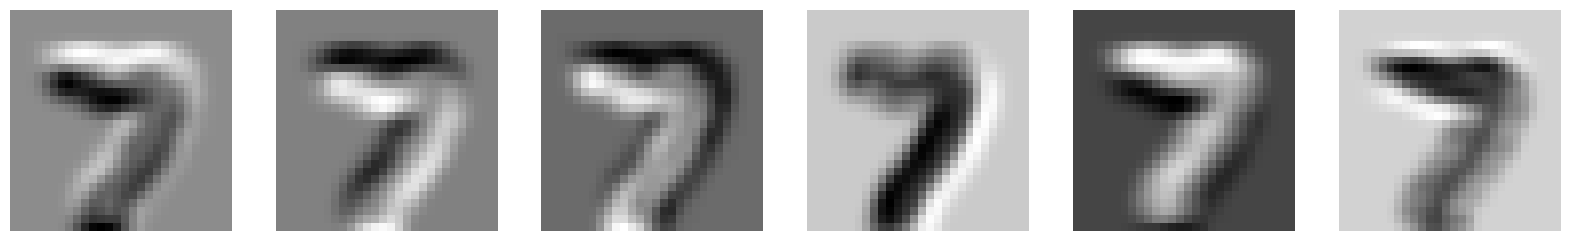

Feature Maps from Conv2d-4 for Image 8:


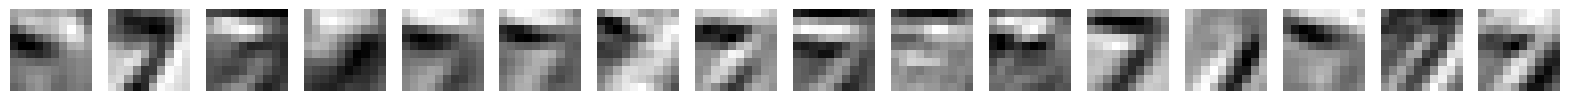

Feature Maps from Conv2d-7 for Image 8:


Visualizing feature maps for Image 9 in the batch
Feature Maps from Conv2d-1 for Image 9:


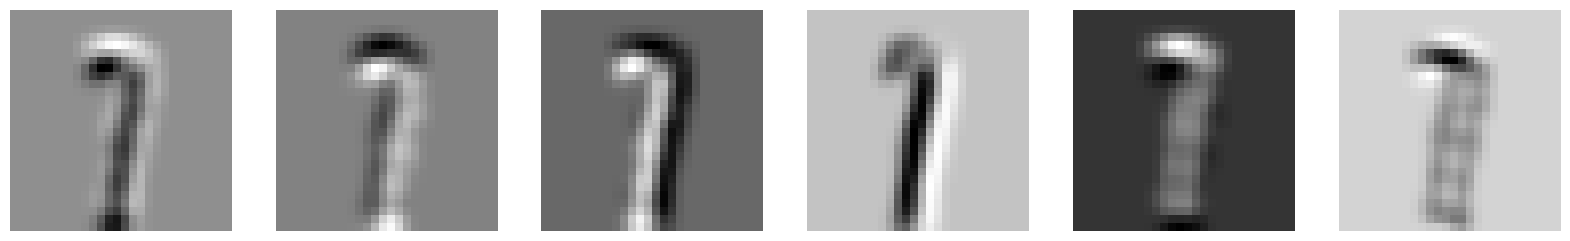

Feature Maps from Conv2d-4 for Image 9:


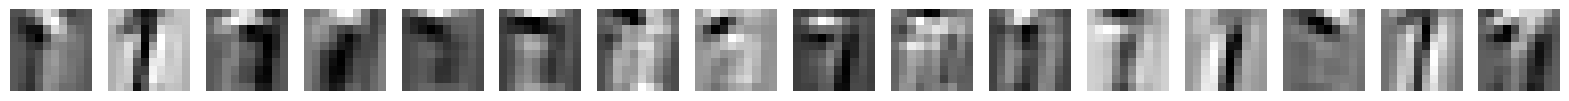

Feature Maps from Conv2d-7 for Image 9:


Visualizing feature maps for Image 10 in the batch
Feature Maps from Conv2d-1 for Image 10:


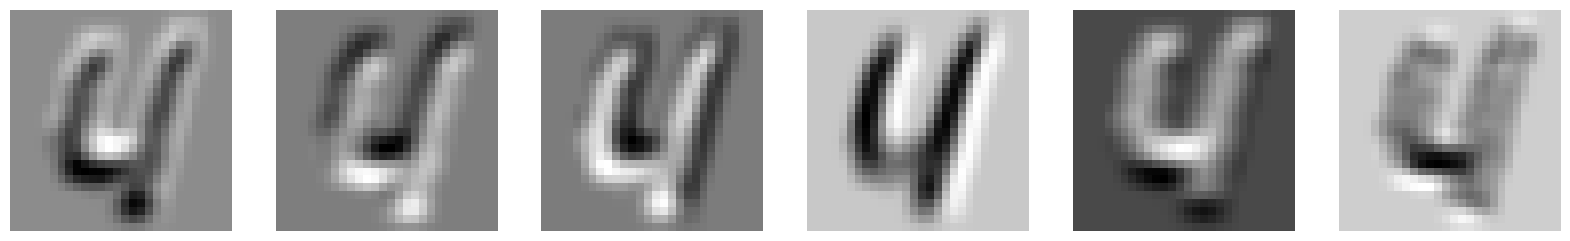

Feature Maps from Conv2d-4 for Image 10:


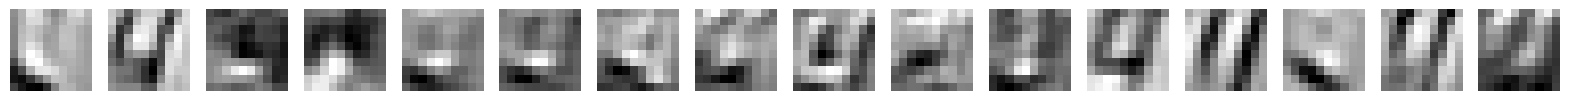

Feature Maps from Conv2d-7 for Image 10:


Visualizing feature maps for Image 11 in the batch
Feature Maps from Conv2d-1 for Image 11:


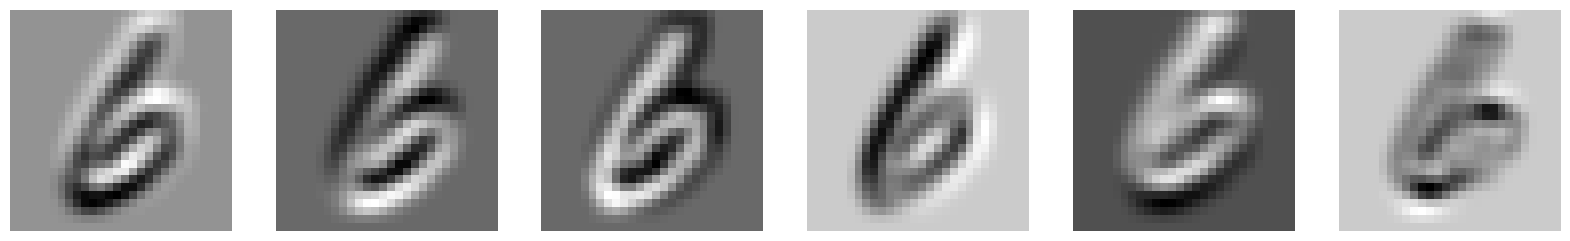

Feature Maps from Conv2d-4 for Image 11:


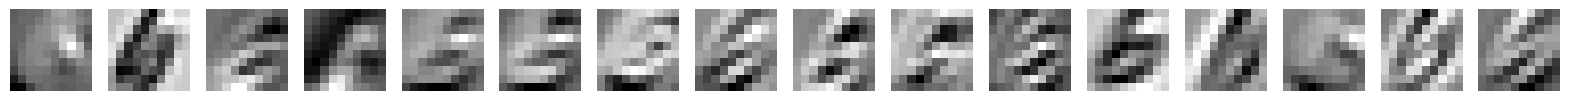

Feature Maps from Conv2d-7 for Image 11:


Visualizing feature maps for Image 12 in the batch
Feature Maps from Conv2d-1 for Image 12:


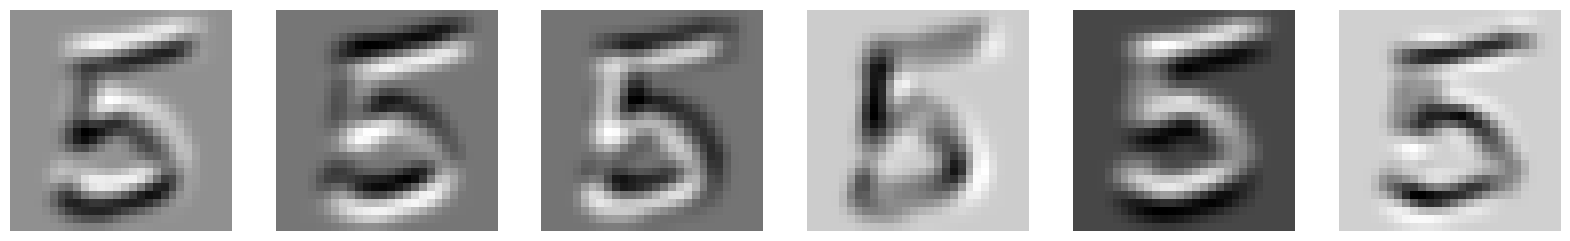

Feature Maps from Conv2d-4 for Image 12:


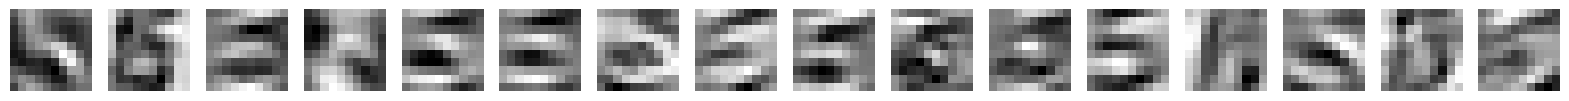

Feature Maps from Conv2d-7 for Image 12:


Visualizing feature maps for Image 13 in the batch
Feature Maps from Conv2d-1 for Image 13:


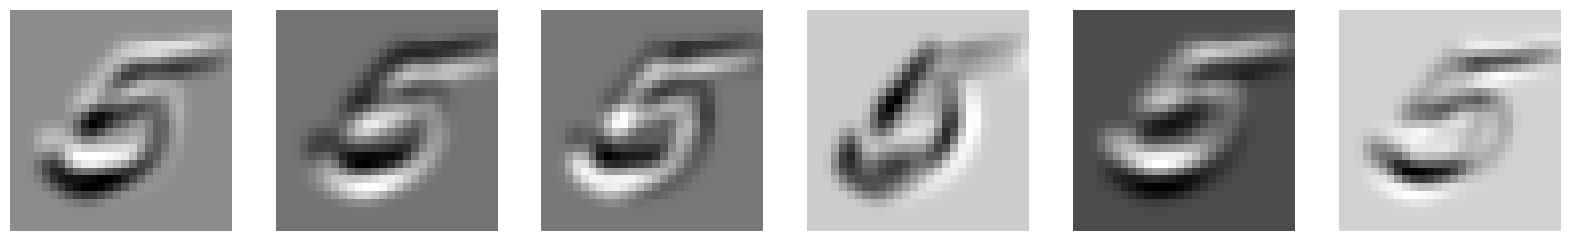

Feature Maps from Conv2d-4 for Image 13:


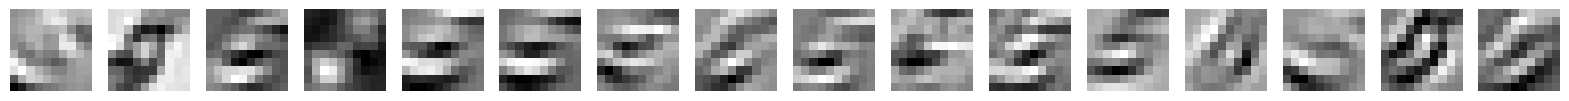

Feature Maps from Conv2d-7 for Image 13:


Visualizing feature maps for Image 14 in the batch
Feature Maps from Conv2d-1 for Image 14:


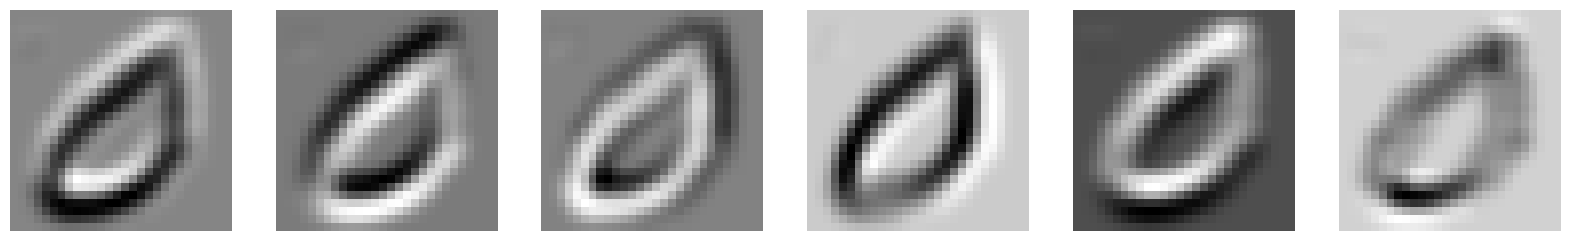

Feature Maps from Conv2d-4 for Image 14:


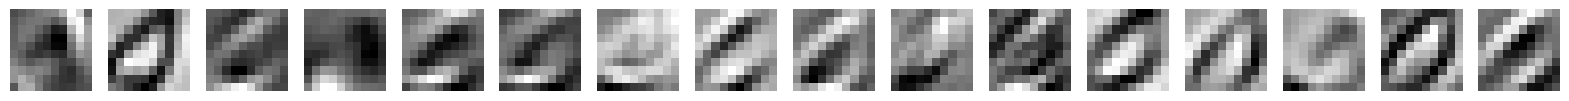

Feature Maps from Conv2d-7 for Image 14:


Visualizing feature maps for Image 15 in the batch
Feature Maps from Conv2d-1 for Image 15:


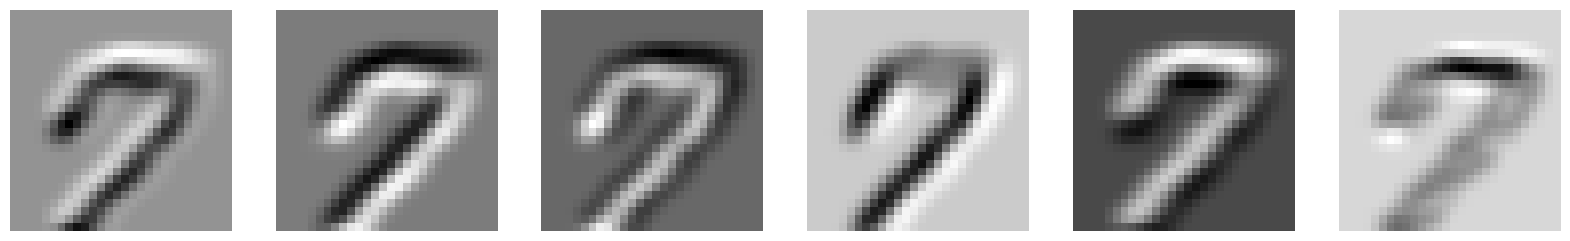

Feature Maps from Conv2d-4 for Image 15:


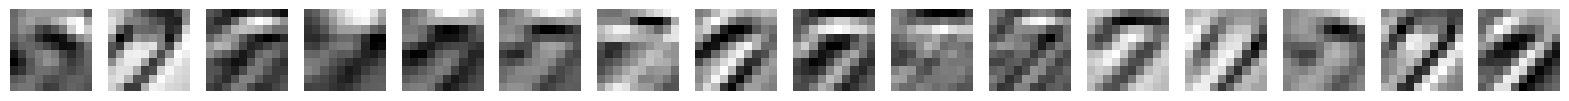

Feature Maps from Conv2d-7 for Image 15:


Visualizing feature maps for Image 16 in the batch
Feature Maps from Conv2d-1 for Image 16:


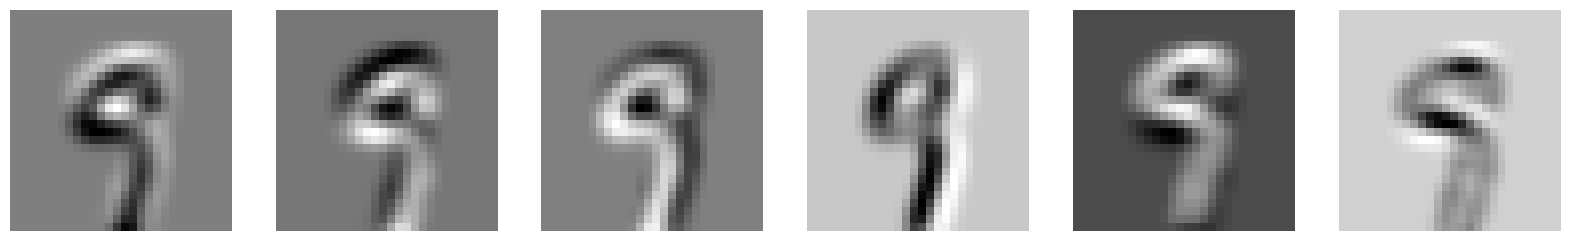

Feature Maps from Conv2d-4 for Image 16:


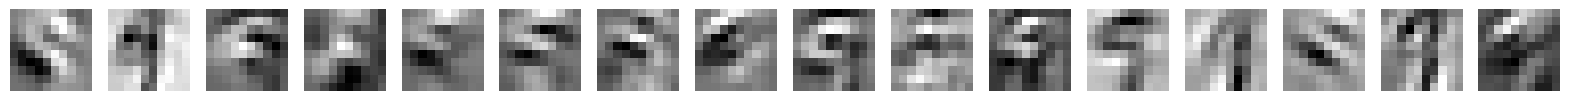

Feature Maps from Conv2d-7 for Image 16:


In [ ]:
for images, _ in train_dataloader:

    images1 = images

    # Print the batch
    plt.figure(figsize=(20, 10))
    plt.axis('off')
    plt.imshow(make_grid(images1, nrow=16, normalize=True).permute((1, 2, 0)))
    plt.show()

    images1 = images.to(device)
    # Forward pass to generate feature maps
    output = model(images1).to(device)

    # Iterate through each image in the batch

    for idx in range(images1.shape[0]):
        print(f"Visualizing feature maps for Image {idx + 1} in the batch")

        for c in activation:
            # Visualize feature maps from the first convolutional layer
            print(f"Feature Maps from {c} for Image {idx + 1}:")
            visualize_feature_maps(activation, c, image_idx=idx)

    break  # Stop after visualizing one batch

$\large\textbf{Testing the model}$

Shape of an Image (Batch Size, Channels, Height, Width): torch.Size([16, 1, 32, 32])


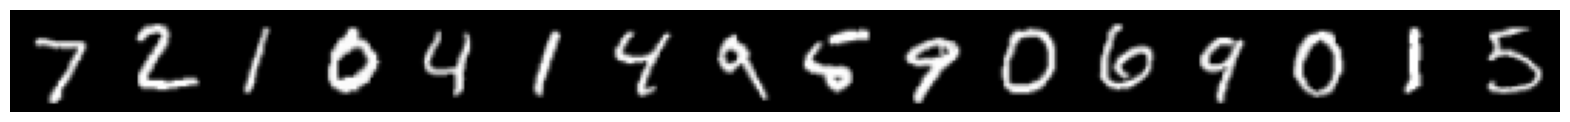

Shape of an Image (Batch Size, Channels, Height, Width): torch.Size([16, 1, 32, 32])


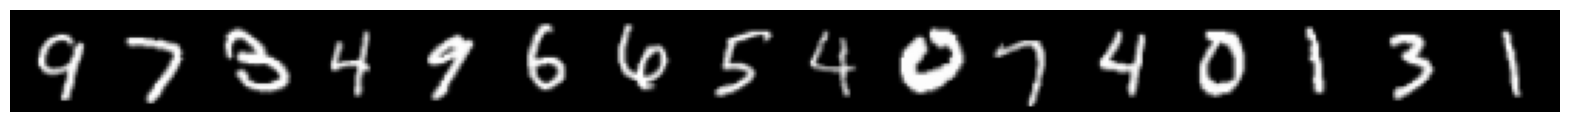

In [ ]:
c =  0
for images, _ in test_dataloader:

    print('Shape of an Image (Batch Size, Channels, Height, Width):', images.shape)

    plt.figure(figsize=(20,10))
    plt.axis('off')
    # Display the grid of images
    plt.imshow(make_grid(images, nrow=16, normalize=True).permute((1, 2, 0)))
    plt.show()
    c += 1
    if c == 2:
        break

$\Large\textbf{Inference from testset}$

In [ ]:
X_test = testset.data
Y_test = testset.targets

print(X_test[0].shape, Y_test[0])

torch.Size([28, 28]) tensor(7)


In [ ]:
transform_ = transforms.Compose([transforms.Resize((32,32))])

In [ ]:
X_test = transform_(X_test.float())

In [ ]:
print(X_test[0].shape, Y_test[0])

torch.Size([32, 32]) tensor(7)


In [ ]:
# Checking first 10 predictions
print("First 10 outputs    :", Y_test[:10])
output = model(X_test[:10].unsqueeze(1).to(device))
preds = torch.argmax(output,dim = 1)
print("First 10 predictions:", preds)

First 10 outputs    : tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])
First 10 predictions: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0')


$\Large\textbf{Inference from test_dataloader}$

In [ ]:
model.eval()
correct_pred = 0
total_sample = 0
y_pred = []
y_true = []

with torch.no_grad():
    for image, label in test_dataloader:

        image = image.to(device)
        label = label.to(device)

        output = model(image)
        preds = torch.argmax(output, dim = 1)

        # Store the predictions and true labels
        y_pred.extend(preds.cpu().numpy())
        y_true.extend(label.cpu().numpy())

        correct_pred += (preds == label).sum().item()

        total_sample += label.shape[0]

$\textbf{Now check the accuracy of model on the entire dataset:}$

In [ ]:
accuracy = (correct_pred / total_sample) * 100
print(f"Model accuracy on test data: {accuracy}%")

Model accuracy on test data: 98.35000000000001%


$\Large\textbf{Confusion Matrix}$

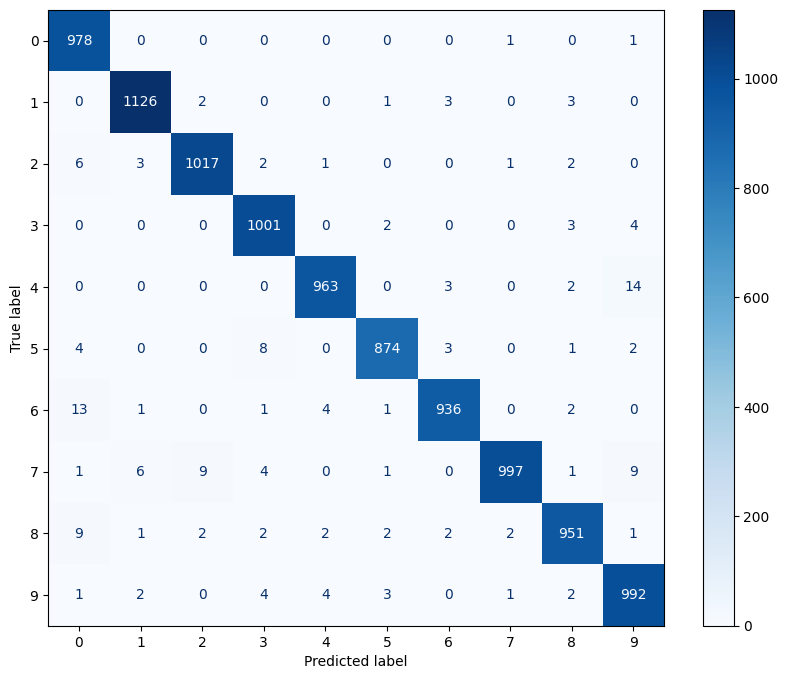


Label totals in dataset:
 [(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix_multiclass = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))

ConfusionMatrixDisplay(matrix_multiclass,  display_labels=[0,1,2,3,4,5,6,7,8,9]).plot(cmap="Blues", values_format='', ax = ax)

plt.show()

print("\nLabel totals in dataset:\n", list(zip([0,1,2,3,4,5,6,7,8,9], np.sum(matrix_multiclass, axis=-1))))